Examples taken from the Scikit-Learn [web site](http://scikit-learn.org/stable/tutorial/basic/tutorial.html)

In [34]:
import sklearn

In [35]:
sklearn.__version__

'0.17.1'

Machine Learning Types
    * Supervised Learning
        * Classification
        * Regession
    * Unsupervised learning

Data set types
    * Training set
    * Testing set

Scikit learn has a number of built in datasets

In [36]:
from sklearn import datasets

In [37]:
print(datasets.load_boston.__doc__.split('\n')[0])
print(datasets.load_breast_cancer.__doc__.split('\n')[0])
print(datasets.load_diabetes.__doc__.split('\n')[0])
print(datasets.load_digits.__doc__.split('\n')[0])
print(datasets.load_files.__doc__.split('\n')[0])
print(datasets.load_iris.__doc__.split('\n')[0])
print(datasets.load_linnerud.__doc__.split('\n')[0])
print(datasets.load_mlcomp.__doc__.split('\n')[0])
print(datasets.load_sample_image.__doc__.split('\n')[0])
print(datasets.load_sample_images.__doc__.split('\n')[0])
print(datasets.load_svmlight_file.__doc__.split('\n')[0])
print(datasets.load_svmlight_files.__doc__.split('\n')[0])

Load and return the boston house-prices dataset (regression).
Load and return the breast cancer wisconsin dataset (classification).
Load and return the diabetes dataset (regression).
Load and return the digits dataset (classification).
Load text files with categories as subfolder names.
Load and return the iris dataset (classification).
Load and return the linnerud dataset (multivariate regression).
Load a datasets as downloaded from http://mlcomp.org
Load the numpy array of a single sample image
Load sample images for image manipulation.
Load datasets in the svmlight / libsvm format into sparse CSR matrix
Load dataset from multiple files in SVMlight format


In [38]:
iris = datasets.load_iris()

The `iris` data set has the following components

In [39]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [64]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Convert to a pandas dataframe

In [42]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['species'] = iris['target']
df.replace({'species':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace('(cm)', '').replace(' ', '') for item in df.columns]

Display a summary of the 4 dimensional data

In [43]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


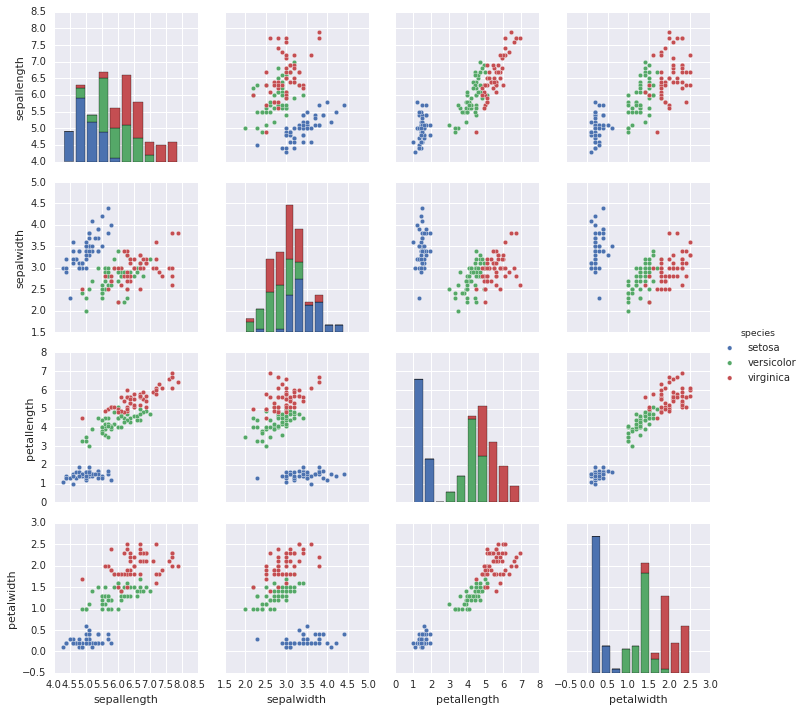

In [44]:
sns.pairplot(df, hue="species")

Use principal component analysis to reduce 4 dimensions to 2

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_proj = pca.fit_transform(iris['data'])
print(iris['data'].shape)
print(iris_proj.shape)

(150, 4)
(150, 2)


Convert reduced dataset to pandas dataframe and plot

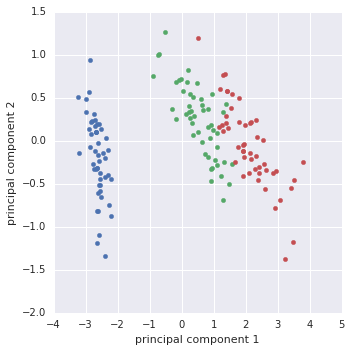

In [61]:
df2 = pd.DataFrame(iris_proj, columns=['pc1', 'pc2'])
df2['species'] = df['species']
g = sns.FacetGrid(df2, hue='species', size=5)
g.map(plt.scatter, 'pc1', 'pc2')
g.set_xlabels('principal component 1')
g.set_ylabels('principal component 2')

Display the variance explained by the principal components

In [62]:
pca.explained_variance_ratio_ * 100

array([ 92.46162072,   5.30155679])

Create a three class logistic regression classifier:
http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html